In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

import joblib
print('libraries loaded successfully')

libraries loaded successfully


# create a simple dataset

In [3]:
data={
    'size_sq_ft':[500,1000,1500,2000,2500,3000,3500,4000],
    'price_N':[50000,200000,350000,400000,450000,500000,600000,800000]
}
df = pd.DataFrame(data)

In [4]:
df

,size_sq_ft,price_N
0,500,50000
1,1000,200000
2,1500,350000
3,2000,400000
4,2500,450000
5,3000,500000
6,3500,600000
7,4000,800000


# understanding the Data

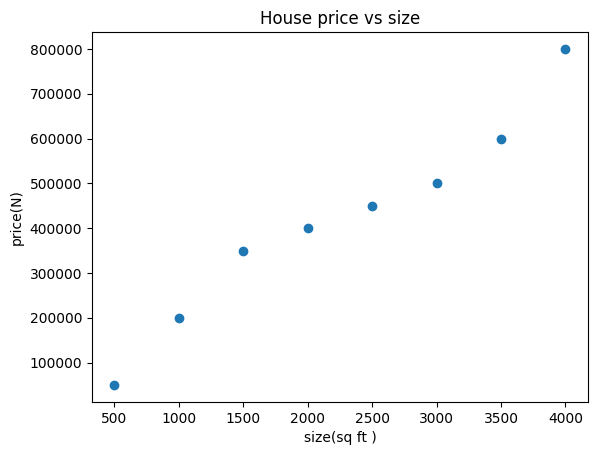

In [5]:
# visualizing the data
plt.scatter(df['size_sq_ft'],df['price_N'])
plt.title('House price vs size')
plt.xlabel('size(sq ft )')
plt.ylabel('price(N)')
plt.show()            

# preparing data for machine learning

In [6]:
#split data into features and target
x=df[['size_sq_ft']]
y=df[['price_N']]

#spitting our data into traning and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## building the model

In [7]:
#create and train the model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred=model.predict(x_test)

In [9]:
y_pred

array([[187000.],
       [569000.]])

# UNDERSTANDING THE MODEL

In [10]:
print(f'slope(a):{model.coef_[0]}')
print(f'intercept(b):{model.intercept_}')

slope(a):[191.]
intercept(b):[-4000.]


# THE MODEL'S EQUATION IS:PRICE=(SLOPE*SIZE+INTERCEPT Y=mx+b

In [11]:
# evaluate the model
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f'mean squared error:{mse:.2f}')
print(f'Root mean squared error:{rmse:.2f}')
print(f'R:squared score:{r2:.2f}')  


mean squared error:2465000000.00
Root mean squared error:49648.77
R:squared score:0.89


# visualize the predicted price vs the actual price

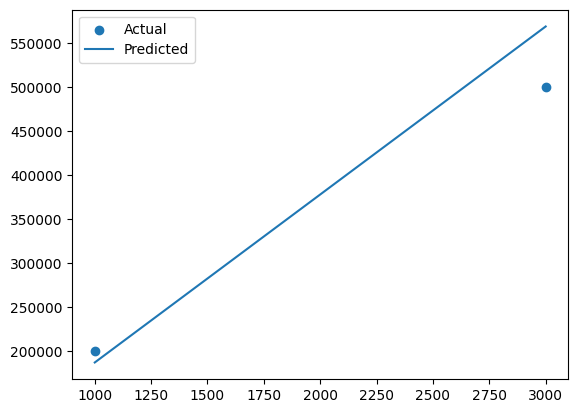

In [12]:
plt.scatter(x_test,y_test,label='Actual')
plt.plot(x_test,y_pred,label='Predicted')
plt.legend()
plt.show()
         

# SAVING MODEL

In [13]:
# saving model
joblib.dump(model,'House_price_predictor.joblib')

['House_price_predictor.joblib']

# IMPORT AND USE MODEL

In [14]:
loaded_model=joblib.load('House_price_predictor.joblib')

In [19]:
new_house=[[4000]]
predicted_price=loaded_model.predict(new_house)
print(f'predicted price:N [predicted_price[0]]')

predicted price:N [predicted_price[0]]


C:\Users\Valued Customer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
